## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows based on Mouse ID and Timepoint are:", duplicate_id, sep='\n')


Duplicate Rows based on Mouse ID and Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].count()

1888

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).mean()
mean.columns = ["Mean"]
median = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).median()
median.columns = ["Median"]
var = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).var()
var.columns = ["Variance"]
stdev = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).std()
stdev.columns = ["Standard Deviation"]
sem = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).sem()
sem.columns = ["SEM"]

summary_stats_df = pd.concat([mean, median, var, stdev, sem], axis=1, join='inner')
summary_stats_df

cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).describe()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.393463  6.568014  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#mean = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).mean().median().var().std().sem()

## Bar and Pie Charts

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                    230
Ceftamin                     178
Infubinol                    178
Ketapril                     188
Naftisol                     186
Placebo                      181
Propriva                     156
Ramicane                     228
Stelasyn                     181
Zoniferol                    182


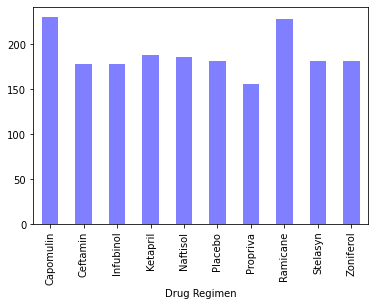

In [132]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total = cleaned_df.groupby(['Drug Regimen'])
total_measure = total['Tumor Volume (mm3)'].count()
total_measure_df = pd.DataFrame(total_measure)
total_measure_df
print(total_measure_df)
total_measure.plot.bar(y='Tumor Volume (mm3)', color='b', alpha=0.5, align="center")


ValueError: shape mismatch: objects cannot be broadcast to a single shape

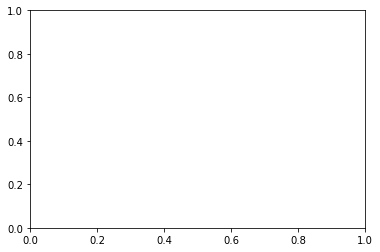

In [134]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total = cleaned_df.groupby(['Drug Regimen'])
total_measure = total['Tumor Volume (mm3)'].count()
total_measure_df = pd.DataFrame(total_measure)
total_measure_df

x_axis = np.arange(len('Drug Regimen'))
plt.bar(x_axis, total_measure_df['Tumor Volume (mm3)'], color='b', alpha=0.5, align="center")


In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
